In [ ]:
# Week 7 Data extraction for smaller d3 dataset

In [3]:
# Imports
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import cluster
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline
from __future__ import division
import random
import math

def extractYear(df): 
    return df.Date.apply(lambda t: int(t.split('/')[2]))

In [3]:
# Load data
df = pd.read_csv('../../data/SFPD_Incidents_-_from_1_January_2003.csv', sep=',')

In [95]:
# For each district find prostitution and vehicle theft counts
scatterList = []
df2 = []
years = extractYear(df)
for district in set(df.PdDistrict):
    if(type(district) != str):
        continue
        
    for year in range(2005, 2013):
        mask = (df.PdDistrict == district) & (years == year)
        d = dict(Counter(df.Category.loc[mask]))
        d['district'] = district
        d['year'] = year
        d['total'] = sum(mask)
        df2.append(pd.DataFrame.from_dict([d]))
df2 = pd.concat(df2)
df2.to_csv('district_crime_categories.csv')

In [89]:
year = extractYear(df)

In [91]:
set(year)

set

In [5]:
import xml.etree.ElementTree
e = xml.etree.ElementTree.parse('../../data/allekontrolresultater.xml').getroot()

In [6]:
df3 = []
for row in e.findall('row'):
    #print pd.DataFrame.from_dict([row.attrib])
    df3.append(pd.DataFrame.from_dict([row.attrib]))
df3 = pd.concat(df3)
df3.to_csv('../../data/allekontrolresultater.csv', encoding="utf-8")

UnicodeEncodeError: 'ascii' codec can't encode character u'\xe6' in position 31: ordinal not in range(128)

In [4]:
df3 = pd.read_csv('../../data/allekontrolresultater.csv')

In [5]:
#df3.Geo_Lat.map(type)
print df3.keys()
lat = df3.Geo_Lat.map(float)
lon = df3.Geo_Lng.map(float)


Index([u'Unnamed: 0', u'By', u'Elite_Smiley', u'Geo_Lat', u'Geo_Lng', u'Kaedenavn', u'URL', u'adresse1', u'branche', u'brancheKode', u'cvrnr', u'fjerdeseneste_kontrol', u'fjerdeseneste_kontrol_dato', u'naestseneste_kontrol', u'naestseneste_kontrol_dato', u'navn1', u'navnelbnr', u'pixibranche', u'pnr', u'postnr', u'reklame_beskyttelse', u'seneste_kontrol', u'seneste_kontrol_dato', u'tredjeseneste_kontrol', u'tredjeseneste_kontrol_dato', u'virksomhedstype'], dtype='object')


In [ ]:
import geoplotlib
from geoplotlib.utils import BoundingBox
mask = (lat.map(math.isnan) == False)
geodata = {"lat": lat.loc[mask],
           "lon": lon.loc[mask]}
geoplotlib.dot(geodata);

geoplotlib.tiles_provider('toner-lite');
geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
geoplotlib.show();

In [265]:

rating = df3[['seneste_kontrol','naestseneste_kontrol','tredjeseneste_kontrol','fjerdeseneste_kontrol']].astype(float)

rating = (rating.sum(axis=1) + 0*rating.isnull().sum(axis=1)).values
Counter(rating)

Counter({0.0: 3920,
         1.0: 5525,
         2.0: 4008,
         3.0: 4021,
         4.0: 29642,
         5.0: 7396,
         6.0: 1312,
         7.0: 622,
         8.0: 464,
         9.0: 114,
         10.0: 75,
         11.0: 39,
         12.0: 13,
         13.0: 14,
         14.0: 7,
         15.0: 3,
         16.0: 4})

In [269]:
df3.loc[df3.cvrnr == '33759320']

,By,Elite_Smiley,Geo_Lat,Geo_Lng,Kaedenavn,URL,adresse1,branche,brancheKode,cvrnr,...,navnelbnr,pixibranche,pnr,postnr,reklame_beskyttelse,seneste_kontrol,seneste_kontrol_dato,tredjeseneste_kontrol,tredjeseneste_kontrol_dato,virksomhedstype


In [276]:
df3.loc[df3.adresse1.str.contains('Hans Knudsens')][['seneste_kontrol','naestseneste_kontrol','tredjeseneste_kontrol','fjerdeseneste_kontrol']]

,seneste_kontrol,naestseneste_kontrol,tredjeseneste_kontrol,fjerdeseneste_kontrol
0,1,1,1,1
0,1,1,1,1
0,1,NaN,NaN,NaN
0,1,1,1,1
0,1,1,1,2
0,1,1,1,1


In [289]:
df3.loc[mask & (df3.postnr == '2100')].URL.values

array(['http://www.findsmiley.dk/da-DK/Searching/DetailsView.htm?virk=546702',
       'http://www.findsmiley.dk/da-DK/Searching/DetailsView.htm?virk=564262'], dtype=object)

# Gadetræer i København

In [325]:
df = pd.read_csv('../../data/gadetraer.csv', sep=',', quotechar='"')

In [326]:
import geoplotlib
from geoplotlib.utils import BoundingBox

geodata = {"lat": df.lat,
           "lon": df.lon}
geoplotlib.dot(geodata);

geoplotlib.tiles_provider('toner-lite');
geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
geoplotlib.show();

In [317]:
df.loc[df.lat.apply(type) != str]

,FID,lat,lon,id,traeart,slaegt,dansk_navn,slaegtsnavn,planteaar,plantet_halvaar,...,fredet_beskyttet_trae,fredning_edoc_nr,trae_historie,botanisk_interesse,donor,anledning,saerligt_trae,saerlig_trae_bem,bydelsnavn,fredet_trae_foto
0,gadetraer.1,12.622150,55.654823,15759,Platanus hybr. acerifolia,Platanus sp.,Platan,Platan,1980,Ikke registreret,...,Ikke registreret,NaN,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Amager Øst,NaN
1,gadetraer.2,12.586075,55.693776,14641,Carpinus betulus 'Fastigiata',Carpinus sp.,Pyramide avnbøg,Avnbøg,2013,Første halvår,...,Ikke registreret,NaN,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Indre By,NaN
2,gadetraer.3,12.587078,55.694602,14669,Carpinus betulus 'Fastigiata',Carpinus sp.,Pyramide avnbøg,Avnbøg,2013,Andet halvår,...,Ikke registreret,NaN,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Indre By,NaN
3,gadetraer.4,12.587605,55.694944,14673,Carpinus betulus 'Fastigiata',Carpinus sp.,Pyramide avnbøg,Avnbøg,2013,Andet halvår,...,Ikke registreret,NaN,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Indre By,NaN
4,gadetraer.5,12.586554,55.694258,14647,Carpinus betulus 'Fastigiata',Carpinus sp.,Pyramide avnbøg,Avnbøg,2013,Andet halvår,...,Ikke registreret,NaN,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Indre By,NaN
5,gadetraer.6,12.589417,55.696184,14799,Carpinus betulus 'Fastigiata',Carpinus sp.,Pyramide avnbøg,Avnbøg,2013,Andet halvår,...,Ikke registreret,NaN,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Indre By,NaN
6,gadetraer.7,12.587886,55.695126,14754,Carpinus betulus 'Fastigiata',Carpinus sp.,Pyramide avnbøg,Avnbøg,2013,Andet halvår,...,Ikke registreret,NaN,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Indre By,NaN
7,gadetraer.8,12.589638,55.696349,14818,Carpinus betulus 'Fastigiata',Carpinus sp.,Pyramide avnbøg,Avnbøg,2013,Andet halvår,...,Ikke registreret,NaN,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Indre By,NaN
8,gadetraer.9,12.588149,55.695299,14756,Carpinus betulus 'Fastigiata',Carpinus sp.,Pyramide avnbøg,Avnbøg,2013,Andet halvår,...,Ikke registreret,NaN,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Indre By,NaN
9,gadetraer.10,12.585761,55.693709,14520,Carpinus betulus 'Fastigiata',Carpinus sp.,Pyramide avnbøg,Avnbøg,2013,Andet halvår,...,Ikke registreret,NaN,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Indre By,NaN


# Rejseplanen API

In [877]:
import urllib2
import urllib
import json
import codecs

DEBUG = True
def log(s):
    if DEBUG:
        print s

# Documentation @ http://labs.rejseplanen.dk/files/Dokumentation/ReST_documentation_Rejseplanen_Latest.pdf
rejseplanen = {"baseurl":"http://xmlopen.rejseplanen.dk/bin/rest.exe/", "dataformat":"json"}

def runQuery(query):
    log(query)
    return urllib2.urlopen("%s%s&format=%s" %
                           (rejseplanen['baseurl'], query, rejseplanen['dataformat'])).read().decode('UTF-8')

def runRaw(query):
    log(query)
    return urllib2.urlopen(str(query)).read().decode('UTF-8')

def rejseplanenLocation(query):
    return runQuery("location?input=%s" % urllib.quote(query, safe=''))

def rejseplanenDepartureBoard(stopId, date="", time="", bus=True, tog=True, metro=True):
    extras = ""
    if date:
        extras += "&date=" + date
    if time:
        extras += "&time=" + time
    if not bus:
        extras += "&useBus=" + str(int(bus))
    if not tog:
        extras += "&useTog=" + str(int(tog))
    if not metro:
        extras += "&useMetro=" + str(int(metro))
    return runQuery("departureBoard?id=%s%s" % (stopId, extras))

def rejseplanenTrip(originId=0, originCoordX=0, originCoordY=0, originCoordName=0,
                    destId=0, destCoordX=0, destCoordY=0, destCoordName=0,
                    viaId=0, date="", time="", searchForArrival=False,
                    bus=True, tog=True, metro=True):
    extras = ""
    if originId:
        extras += "&originId=%s" % originId
    if originCoordX:
        extras += "&originCoordX=%s" % originCoordX
    if originCoordY:
        extras += "&originCoordY=%s" % originCoordY
    if originCoordName:
        extras += "&originCoordName=%s" % urllib.quote(originCoordName, safe='')
    if destId:
        extras += "&destId=%s" % destId
    if destCoordX:
        extras += "&destCoordX=%s" % destCoordX
    if destCoordY:
        extras += "&destCoordY=%s" % destCoordY
    if destCoordName:
        extras += "&destCoordName=%s" % urllib.quote(destCoordName, safe='')
    if viaId:
        extras += "&viaId=%s" % viaId
    if date:
        extras += "&date=" + date
    if time:
        extras += "&time=" + time
    if not bus:
        extras += "&useBus=%s" % int(bus)
    if not tog:
        extras += "&useTog=%s" % int(tog)
    if not metro:
        extras += "&useMetro=%s" % int(metro)
    
    return runQuery("trip?%s" % extras)

# http://<baseurl>/stopsNearby?coordX=12565796&coordY=55673063&maxRadius=1000&maxNumber=30
def rejseplanenStopsNearby(coordX, coordY, maxRadius=0, maxNumber=0):
    extras = "coordX=%s&coordY=%s" % (coordX, coordY)
    if maxRadius:
        extras += "&maxRadius=%s" % maxRadius
    if maxNumber:
        extras += "&maxNumber=%s" % maxNumber
    
    return runQuery("stopsNearby?%s" % extras)


In [829]:
query = "K\xf8benhavn H"

stops = json.loads(rejseplanenLocation(query))['LocationList']['StopLocation']
departures = json.loads(rejseplanenDepartureBoard(stops[0]['id'], date="20.03.16"))#['DepartureBoard']['Departure']
print [stop['name'] for stop in stops]

location?input=K%F8benhavn%20H
departureBoard?id=008600626&date=20.03.16
[u'K\xf8benhavn H', u'K\xf8benhavn Vesterbrogade (fjernbus)', u'K\xf8benhavn, Bernstorffsgade (fjernbus)', u'K\xf8benhavns Lufthavn St.', u'K\xf8benhavnsvej', u'K\xf8benhavnsvej', u'K\xf8benhavnsvej 201', u'K\xf8benhavnsvej (K\xf8ge)', u'K\xf8benhavnsvej (K\xf8ge)', u'K\xf8benhavnsvej v/ Gamle By', u'K\xf8benhavns Lufthavn, Terminal 2 (Terminalgade)', u'K\xf8benhavns Lufthavn, Terminal 3 (Ellehammersvej)', u'K\xf8benhavnsvej (Ny Tofteg\xe5rdsvej)', u'K\xf8benhavns lufthavn, Kastrup, Terminal 2', u'K\xf8benhavns lufthavn, Kastrup, Terminal 3', u'Kongens Nytorv (K\xf8benhavn)', u'B\xf8rsen (K\xf8benhavn)', u'Engvej (K\xf8benhavn)', u'Jagtvej (K\xf8benhavn)', u'Jagtvej (K\xf8benhavn)', u'Axeltorv (K\xf8benhavn)', u'Elmegade (K\xf8benhavn)', u'F\xe6lledvej (K\xf8benhavn)', u'N\xf8rreport (K\xf8benhavn)', u'Posthuset (K\xf8benhavn)', u'Tagensvej (K\xf8benhavn)', u'Backersvej (K\xf8benhavn)', u'Nyhavn (K\xf8benhavn Havn

In [616]:
#for departure in departures['DepartureBoard']['Departure']:
geodata = {"lat": [],
           "lon": [],
           "name":[]}
for departure in departures:
    for stop in json.loads(runRaw(departure['JourneyDetailRef']['ref']))['JourneyDetail']['Stop']:
        geodata['lat'].append(int(stop['y'])/1e6)
        geodata['lon'].append(int(stop['x'])/1e6)
        geodata['name'].append(stop['name'])
log(geodata)

{u'rtDate': u'20.03.16', u'direction': u'Kokkedal St.', u'name': u'Bus 500S', u'messages': u'0', u'stop': u'Rigshospitalet, Glostrup (Nordre Ringvej)', u'rtTime': u'20:33', u'time': u'20:32', u'date': u'20.03.16', u'finalStop': u'Kokkedal St.', u'type': u'EXB', u'JourneyDetailRef': {u'ref': u'http://xmlopen.rejseplanen.dk/bin/rest.exe/journeyDetail?ref=329283%2F114850%2F16782%2F101370%2F86%3Fdate%3D20.03.16%26format%3Djson%26'}}
{u'rtDate': u'20.03.16', u'direction': u'Albertslund St.', u'name': u'Bus 149', u'messages': u'0', u'stop': u'Rigshospitalet, Glostrup (Nordre Ringvej)', u'rtTime': u'20:35', u'time': u'20:34', u'date': u'20.03.16', u'finalStop': u'Albertslund St. (Hedemarksvej)', u'type': u'BUS', u'JourneyDetailRef': {u'ref': u'http://xmlopen.rejseplanen.dk/bin/rest.exe/journeyDetail?ref=111735%2F38187%2F717612%2F321575%2F86%3Fdate%3D20.03.16%26format%3Djson%26'}}
{u'direction': u'Ish\xf8j St.', u'name': u'Bus 300S', u'messages': u'1', u'stop': u'Rigshospitalet, Glostrup (Nord

In [589]:
geoplotlib.dot(geodata);

geoplotlib.tiles_provider('toner-lite');
geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
geoplotlib.inline();

In [610]:

for departure in departures['DepartureBoard']['Departure']:
    print departure['time']

20:20
20:32
20:34
20:36
20:40
20:41
20:56
21:00
21:02
21:11
21:16
21:19
21:20
21:32
21:34
21:36
21:40
21:41
21:56
22:00


In [751]:
query = "Flintholm"
stops = json.loads(rejseplanenLocation(query))['LocationList']['StopLocation']
stopId = stops[0]['id']

def getDeparturesForDate(stopId, date):
    # hashmap of departures
    allDepartures = {}
    # start conditions
    t = "00:00"
    for Iter in range(20):
        departures = json.loads(rejseplanenDepartureBoard(stopId, date=date, time=t))['DepartureBoard']['Departure']
        for departure in departures:
            # end conditions
            #if departure['date'] != date:
                #print departure
                #return allDepartures
            allDepartures["".join(departure.values()[0:-1])] = departure
        t = departures[-1]['time']
    return allDepartures

departures = getDeparturesForDate(stopId, "20.03.16")


In [752]:
for departure in sorted(departures.values(), key = lambda e: (e['date'],e['time'])):
    print departure['time'] + " " + departure['name']

23:09 C
00:02 F
00:04 F
00:04 Bus 9A
00:07 Bus 21
00:08 Bus 34
00:09 C
00:12 F
00:14 Bus 9A
00:14 Bus 13
00:14 F
00:16 C
00:17 Bus 21
00:18 Bus 13
00:19 Bus 9A
00:19 Bus 10
00:21 Bus 22
00:22 F
00:23 Bus 22
00:24 F
00:28 Bus 10
00:29 C
00:32 F
00:34 Bus 9A
00:34 F
00:36 C
00:37 Bus 21
00:39 Bus 9A
00:42 F
00:44 F
00:44 Bus 13
00:48 Bus 13
00:49 C
00:53 Bus 22
00:54 Bus 9A
00:54 F
00:56 C
00:58 Bus 10
01:04 F
01:09 C
01:09 Bus 9A
01:12 F
01:14 Bus 9A
01:34 F
01:36 C
01:37 Bus 9A
01:39 C
01:41 Bus 9A
01:42 F
01:57 Bus 9A
02:01 Bus 9A
02:04 F
02:06 C
02:09 C
02:12 F
02:17 Bus 9A
02:21 Bus 9A
02:34 F
02:36 C
02:37 Bus 9A
02:39 C
02:41 Bus 9A
02:42 F
02:57 Bus 9A
03:01 Bus 9A
03:04 F
03:06 C
03:09 C
03:12 F
03:17 Bus 9A
03:21 Bus 9A
03:34 F
03:36 C
03:37 Bus 9A
03:39 C
03:41 Bus 9A
03:42 F
03:57 Bus 9A
04:01 Bus 9A
04:04 F
04:06 C
04:09 C
04:12 F
04:17 Bus 9A
04:21 Bus 9A
04:34 F
04:36 C
04:37 Bus 9A
04:39 C
04:41 Bus 9A
04:42 F
04:57 Bus 9A
05:01 Bus 9A
05:04 F
05:06 C
05:09 C
05:12 F
05:1

In [753]:
import time
#for departure in departures['DepartureBoard']['Departure']:
geodata = {"lat": [],
           "lon": [],
           "name":[]}
for departure in sorted(departures.values(), key = lambda e: (e['date'],e['time'])):
    stops = json.loads(runRaw(departure['JourneyDetailRef']['ref']))
    try:
        for stop in stops['JourneyDetail']['Stop']:
            geodata['lat'].append(int(stop['y'])/1e6)
            geodata['lon'].append(int(stop['x'])/1e6)
            geodata['name'].append(stop['name'])
    except KeyError:
        #print "KeyError extracting stop data:"
        print stops
    #time.sleep(1)
log(geodata)

In [756]:
geoplotlib.dot(geodata);

geoplotlib.tiles_provider('toner-lite');
geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
geoplotlib.inline();

In [744]:
for departure in sorted(departures.values(), key = lambda e: (e['date'],e['time'])):
    print departure['time'] +" "+ departure['name']

22:58 C
00:00 ØR 1918
00:01 ØR 1921
00:01 Bus 66
00:02 IC 193
00:02 Bus 2A
00:02 Bus 250S
00:03 A
00:03 Bus 250S
00:04 Bus 6A
00:04 A
00:05 Bus 1A
00:05 Bus 5A
00:05 Bus 250S
00:06 Bus 34
00:06 Bus 250S
00:06 Bus 5A
00:06 Bus 14
00:06 Bus 2A
00:08 Bus 26
00:08 Bus 2A
00:08 Bus 2A
00:08 Bus 5A
00:08 Bus 6A
00:09 Bus 5A
00:09 C
00:10 Bus 14
00:10 Bus 6A
00:10 B
00:10 Re 4293
00:10 Bus 26
00:10 Bus 14
00:11 Bus 66
00:12 Bus 2A
00:12 Bus 6A
00:14 Bus 14
00:15 Bus 26
00:15 Bus 5A
00:15 Bus 33
00:16 Bus 2A
00:16 Bus 33
00:16 Bus 66
00:16 Bus 9A
00:16 Bus 5A
00:17 B
00:17 Re 4093
00:17 Bus 26
00:18 Bus 1A
00:18 C
00:18 Bus 2A
00:18 Bus 5A
00:18 Re 4174
00:18 Bus 2A
00:19 Bus 9A
00:19 Bus 5A
00:20 ØR 1920
00:21 ØR 1923
00:22 Bus 250S
00:22 Bus 10
00:22 Bus 37
00:22 Bus 2A
00:23 A
00:23 Bus 250S
00:23 Bus 10
00:24 A
00:24 Bus 6A
00:25 Bus 1A
00:25 Bus 250S
00:25 Bus 10
00:25 Bus 5A
00:26 Bus 5A
00:26 Bus 66
00:26 Bus 250S
00:28 Bus 5A
00:28 Bus 34
00:28 Bus 34
00:28 Bus 6A
00:28 Re 2597
00:29 B

In [794]:
print rejseplanenLocation("8600007")

{
"LocationList":{
  "noNamespaceSchemaLocation":"http://xmlopen.rejseplanen.dk/xml/rest/hafasRestLocation.xsd",
  "StopLocation":{
    "name":"Sindal St.",
    "x":"10202415",
    "y":"57470187",
    "id":"008600007"
    }
  }
}


In [1128]:
h = .1 # step size in the mesh

xx, yy = np.meshgrid(np.arange(8, 12.7, h), np.arange(54.6, 58, h))
geodata = {"lat": yy.ravel(),
           "lon": xx.ravel()}

geoplotlib.dot(geodata);

geoplotlib.tiles_provider('toner-lite');
geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
geoplotlib.show();

In [1129]:
DEBUG = False
#dateformat = "%d.%m.%y%H:%M"

def convertToDateTime(df):
    return datetime.datetime.strptime(df['date']+df['time'], "%d.%m.%y%H:%M")

df = []
dfc = []
for (lat,lon) in zip(geodata['lat'],geodata['lon']):
    try:
        nearby = json.loads(rejseplanenStopsNearby(int(lat*1e6), int(lon*1e6)))['LocationList']['StopLocation'][0]
        #print nearby
        trip = json.loads(rejseplanenTrip(originId=8600626,
            destCoordX=nearby['x'], destCoordY=nearby['y'],
            destCoordName=nearby['name'].encode('utf8')))['TripList']['Trip'][0]
        #print trip
        times = [(convertToDateTime(leg['Origin']), convertToDateTime(leg['Destination'])) for leg in trip['Leg']]
        df.append([int(nearby['y'])/1e6,int(nearby['x'])/1e6,(times[-1][-1] - times[0][0]).seconds/60])
        dfc.append([(leg['name'], leg['type'], leg['Origin']['name'], leg['Destination']['name']) for leg in trip['Leg']])
    except KeyError,e: 
        print "KeyError @ (%s,%s)" % (lat,lon)
        print str(e)
#df
# [[u'Origin', u'name', u'Notes', u'Destination', u'MessageList', u'type', u'JourneyDetailRef']]

KeyError @ (54.6,8.0)
'StopLocation'
KeyError @ (54.6,8.1)
'StopLocation'
KeyError @ (54.6,8.2)
'StopLocation'
KeyError @ (54.6,8.3)
'StopLocation'
KeyError @ (54.6,8.4)
'StopLocation'
KeyError @ (54.6,8.5)
'StopLocation'
KeyError @ (54.6,8.6)
'StopLocation'
KeyError @ (54.6,8.7)
'StopLocation'
KeyError @ (54.6,8.8)
'StopLocation'
KeyError @ (54.6,8.9)
'StopLocation'
KeyError @ (54.6,9.0)
'StopLocation'
KeyError @ (54.6,9.1)
'StopLocation'
KeyError @ (54.6,9.2)
'StopLocation'
KeyError @ (54.6,9.3)
'StopLocation'
KeyError @ (54.6,9.4)
'StopLocation'
KeyError @ (54.6,9.5)
'StopLocation'
KeyError @ (54.6,9.6)
'StopLocation'
KeyError @ (54.6,9.7)
'StopLocation'
KeyError @ (54.6,9.8)
'StopLocation'
KeyError @ (54.6,9.9)
'StopLocation'
KeyError @ (54.6,10.0)
'StopLocation'
KeyError @ (54.6,10.1)
'StopLocation'
KeyError @ (54.6,10.2)
'StopLocation'
KeyError @ (54.6,10.3)
'StopLocation'
KeyError @ (54.6,10.4)
'StopLocation'
KeyError @ (54.6,10.5)
'StopLocation'
KeyError @ (54.6,10.6)
'StopLoca

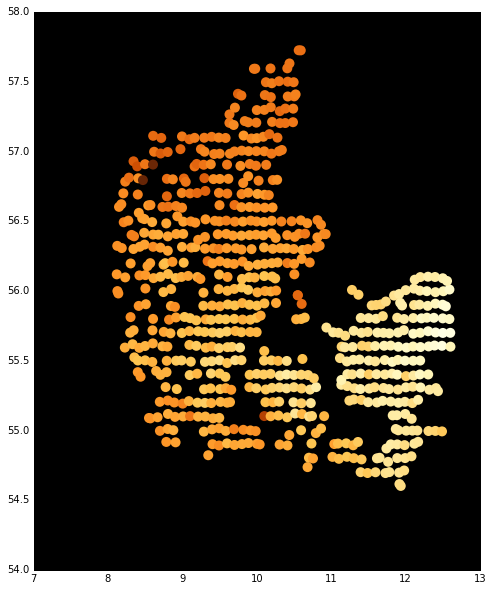

In [1208]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, axisbg='black')
ax.scatter([x[1] for x in df], [x[0] for x in df],c=[math.sqrt(x[2]) for x in df], cmap='YlOrBr',
           lw = 0, s=100)
geodata = {"lat": [x[0] for x in df],
           "lon": [x[1] for x in df]}
geoplotlib.dot(geodata);

geoplotlib.tiles_provider('toner-lite');
geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
#geoplotlib.inline();
#sorted(zip([x[2] for x in df], dfc))

In [1167]:
buf = []
for trip in dfc:
    for leg in trip:
        buf.append(leg[0] + " " + leg[1])

#print sorted(zip([x[2] for x in df], [x[0][3] if x[0][1] != "WALK" else x[1][3] for x in dfc]))
#print Counter(buf).most_common()

In [1166]:
city = [x[0][3] if x[0][1] != "WALK" else x[1][3] for x in dfc]
print Counter(city).most_common()
target = [u'Nyk\xf8bing F St.']
geodata = {"lat": [x[0] for x,c in zip(df,city) if c in target],
           "lon": [x[1] for x,c in zip(df,city) if c in target]}
geoplotlib.dot(geodata);

geoplotlib.tiles_provider('toner-lite');
geoplotlib.set_bbox(BoundingBox(max(geodata['lat']), max(geodata['lon']), min(geodata['lat']), min(geodata['lon'])));
geoplotlib.inline();

[(u'Odense St.', 66), (u'Aarhus H', 62), (u'Aalborg St.', 55), (u'Fredericia St.', 38), (u'Nyk\xf8bing F St.', 23), (u'Horsens St.', 23), (u'Holstebro St.', 22), (u'Vejle St.', 22), (u'Nyborg St.', 20), (u'Herning St.', 19), (u'Slagelse St.', 17), (u'R\xf8dekro St.', 15), (u'Holb\xe6k St.', 15), (u'Struer St.', 14), (u'Vordingborg St.', 14), (u'Hobro St.', 14), (u'Vojens St.', 12), (u'Hiller\xf8d St.', 12), (u'K\xf8ge St.', 11), (u'Ringsted St.', 9), (u'S\xf8nderborg St.', 9), (u'Randers St.', 8), (u'Skanderborg St.', 8), (u'N\xe6stved St.', 8), (u'Kolding St.', 7), (u'Kalundborg St.', 6), (u'Kors\xf8r St.', 6), (u'Hj\xf8rring St.', 6), (u'Frederikssund St.', 5), (u'Frederikshavn St.', 5), (u'St\xf8vring St.', 4), (u'Gr\xe5sten St.', 4), (u'Tinglev St.', 4), (u'Roskilde St.', 4), (u'Lundby St.', 3), (u'Helsing\xf8r St.', 3), (u'Hadsten St.', 3), (u'Skalborg St.', 3), (u'Br\xf8nderslev St.', 3), (u'Solr\xf8d Strand St.', 3), (u'T\xf8ll\xf8se St.', 3), (u'Greve St.', 2), (u'Sor\xf8 St.',